In [1]:

from SimuBox import Landscaper, VoronoiCell, Scatter, TopoCreater
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np


## 拓扑结构

format: id(count_id)
0(0)-1(1)
0(0)-1(2)
0(0)-1(3)
0(0)-1(4)
0(0)-1(5)
1(5)-2(6)
2(6)-3(11)
1(4)-2(7)
2(7)-3(12)
1(3)-2(8)
2(8)-3(13)
1(2)-2(9)
2(9)-3(14)
1(1)-2(10)
2(10)-3(15)


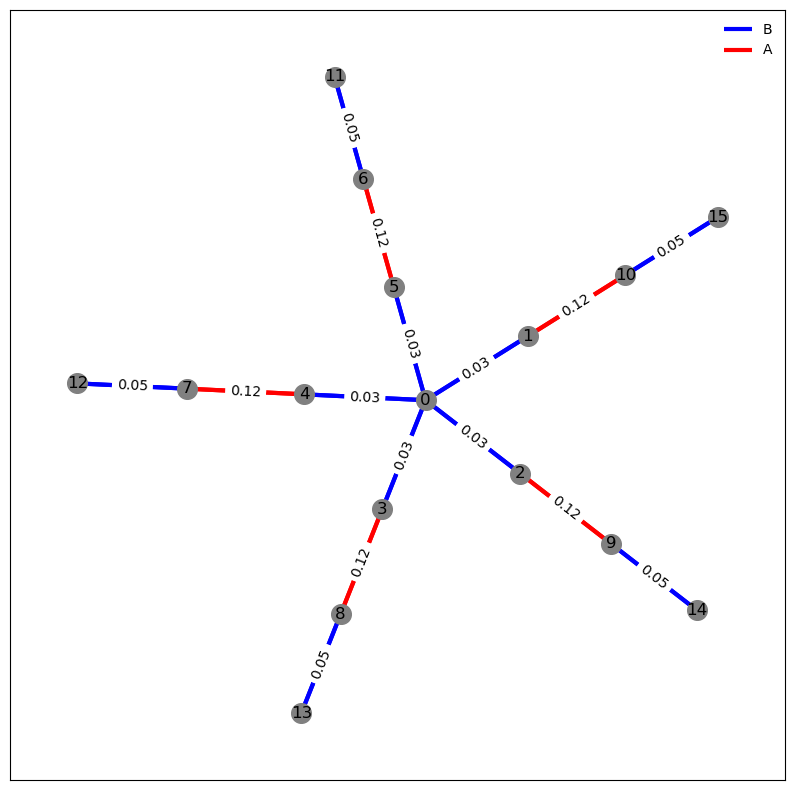

ODT is 79.35398092239298


In [2]:
tc = TopoCreater()
tc.fromJson('./Datasets/Topo/input_star.json')
tc.show_topo(colorlist=['b','r'])
tc.RPA()
tc.ODT()

## 散射图

[192 192] [1 1]


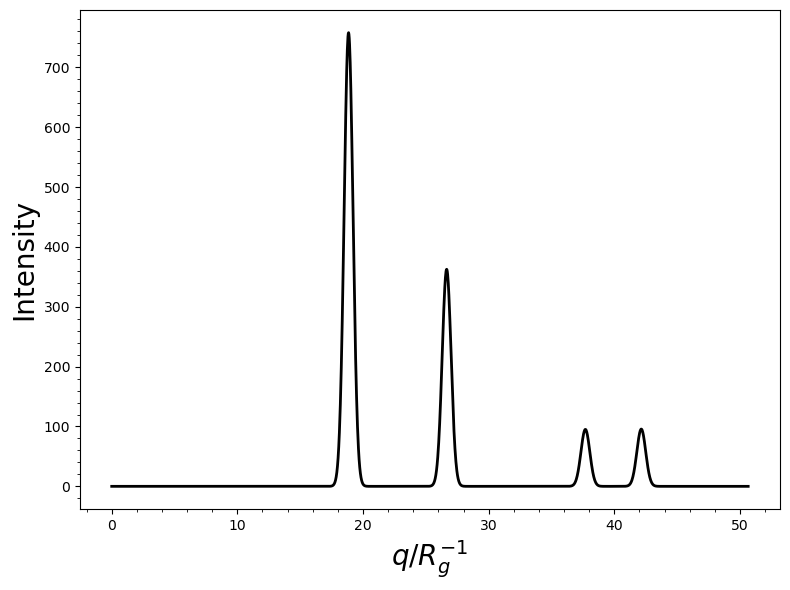

array([1.        , 1.41397849, 2.        , 2.23521505])

In [7]:
from SimuBox import read_density, read_printout, parse_density, iso2D
path = "./Datasets/Scatter/phout_C4.txt"
des = read_density(path)
res = parse_density(density=des, target=0)
print(des.shape, des.lxlylz)
sc = Scatter.sacttering_peak(mat=res[0], NxNyNz=des.shape, lxlylz=des.lxlylz)
Scatter.show_peak(res=sc, cutoff=300)

## 二维结构图

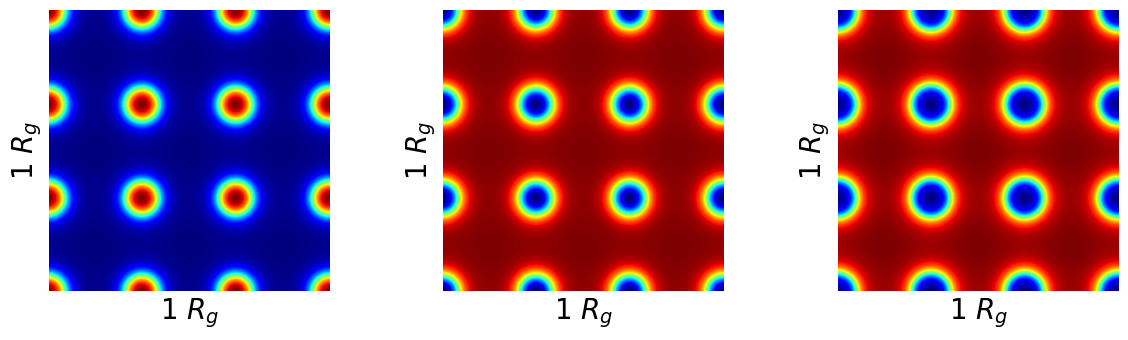

In [8]:
iso2D(des, target=[0,1,2])

## 自由能景观图

极小值点: ly: 2.051041, lz:2.051041, freeE: 11.68579359
Free energy mat shape: (121, 121)
level:  0.001 面积： 0.06137515892651197 周长： 1.3302406387698007 IQ:  0.4358550386775006
level:  0.01 面积： 0.4122518259705505 周长： 2.8725683649276608 IQ:  0.6278150251630036


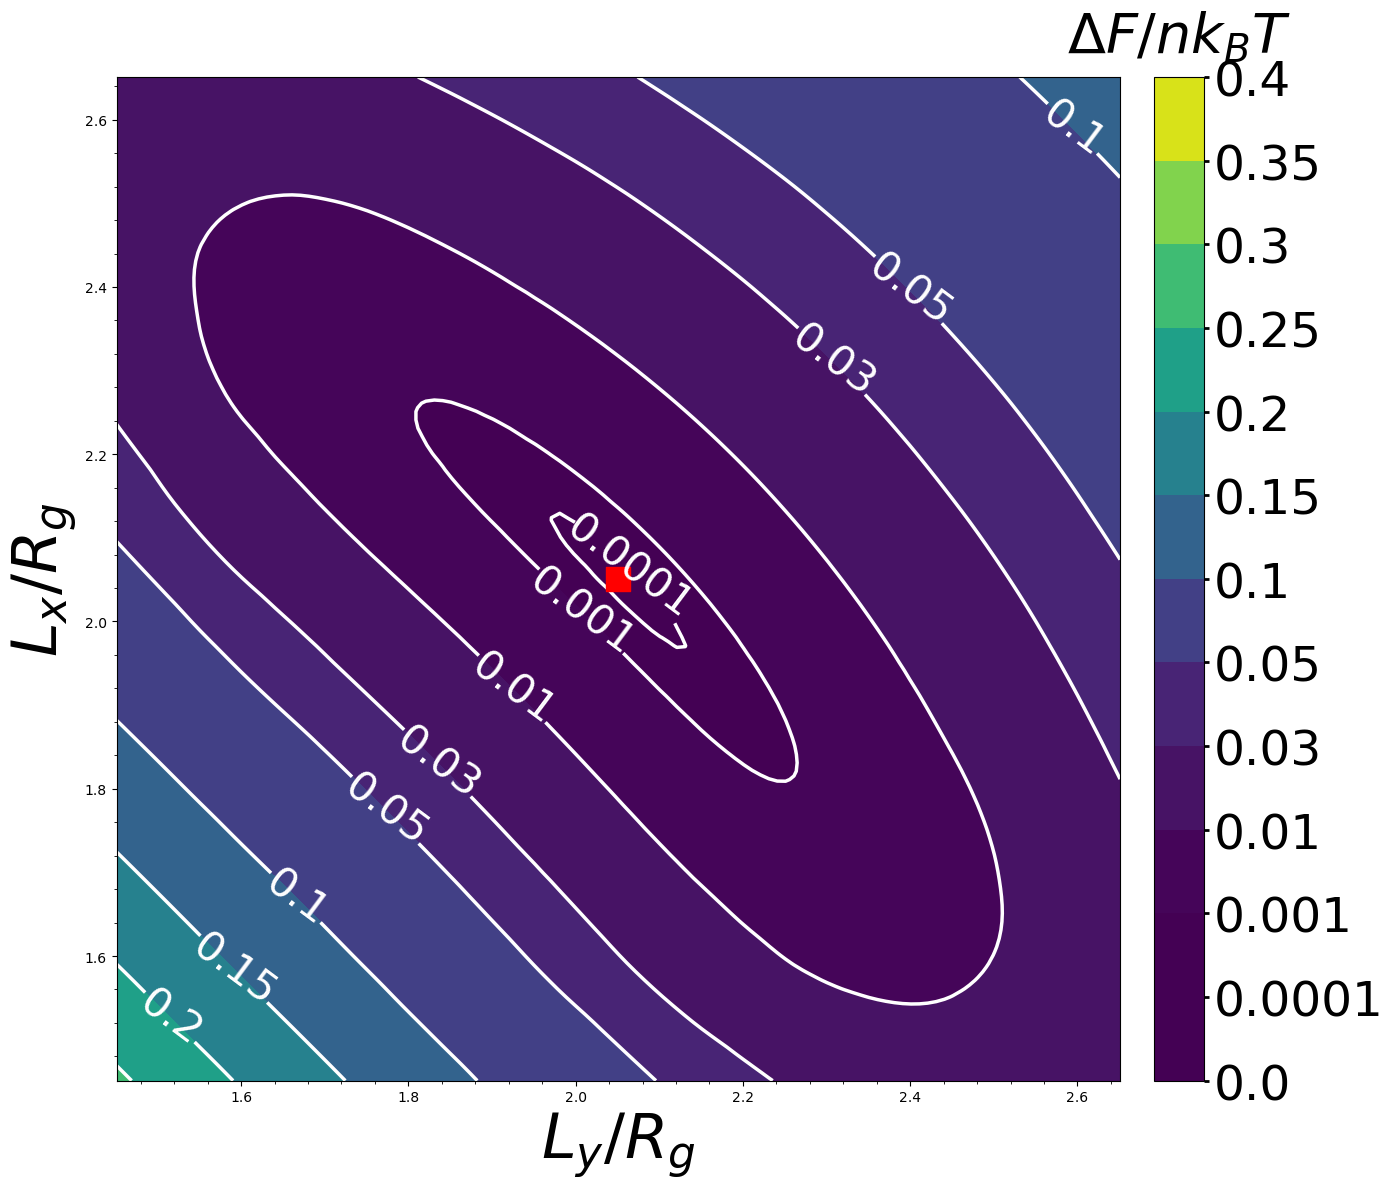

In [3]:
land = Landscaper(path='./Datasets/landscape.csv')
res = land.prospect(
    levels=[0, 0.0001, 0.001, 0.01, 0.03, 0.05,
            0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    precision=-4,
    asp='square',
    xminor=5,
    yminor=5,
    clbacc=4,
    figsize=(16, 12),
    point_list=[
        [2.05104063, 2.05104063, 's', 'r', 300]
    ],
    manual=[
        (1.5, 1.5),
        (1.6,1.6),
        (1.66,1.66),
        (1.77,1.77),
        (1.84,1.84),
        (1.93,1.93),
        (2, 2),
        (2.06,2.06),
        (2.3,2.3),
        (2.4,2.4),
        (2.6,2.6),
    ]
    )


## Voronoi Cell

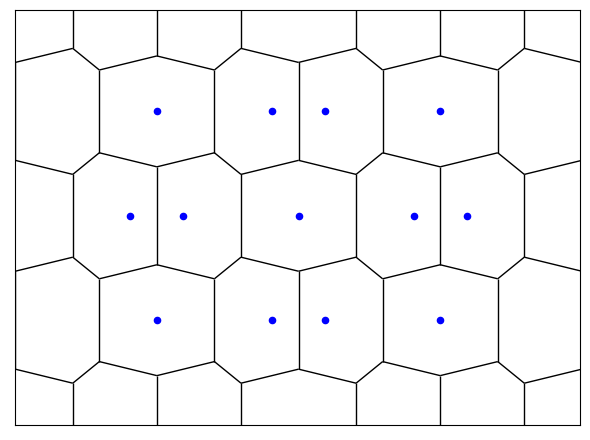

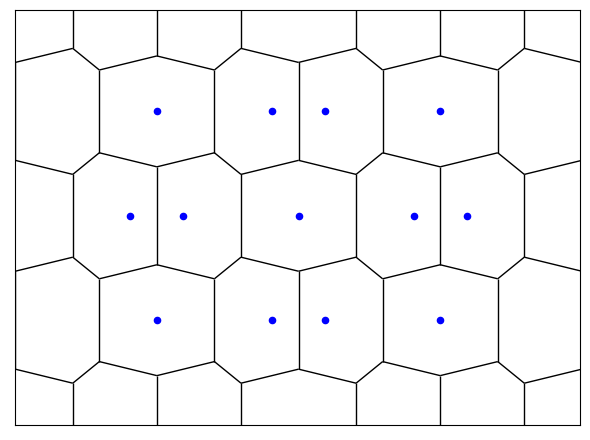

In [2]:
from SimuBox import AnalyzeMode, read_printout, read_density, VoronoiCell
import numpy as np
des = read_density("./Datasets/Voronoi")
pri = read_printout("./Datasets/Voronoi")
des.repair(pri)
VoronoiCell.Analyze(density=des, mode=AnalyzeMode.VORONOI, slices=(0, 0))

100%|██████████| 250000/250000 [00:02<00:00, 100606.27it/s]


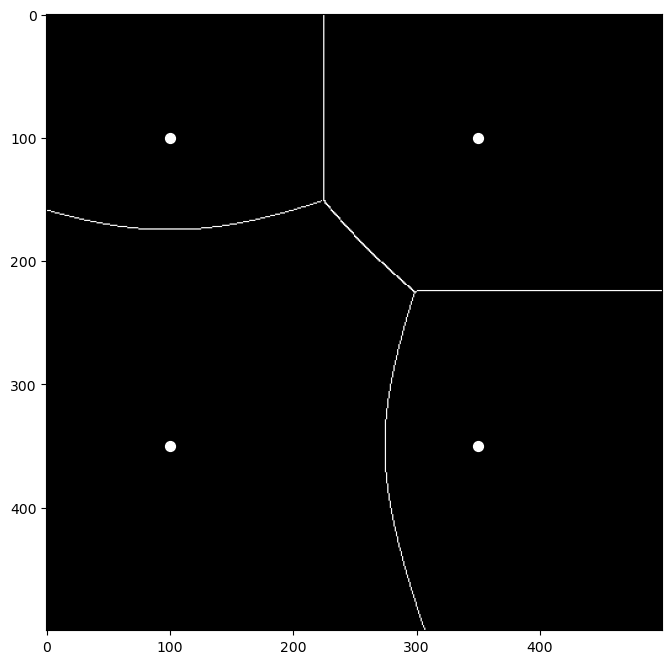

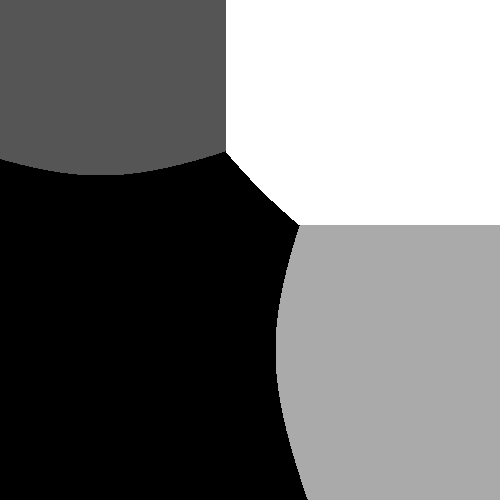

In [7]:
from SimuBox import WeightedMethod
VoronoiCell.weighted_voronoi_diagrams(
        [[100,350],[100,100],[350,350],[350,100]],
        weights=[1e2,0,0,0],
        plot='vertices',
        method=WeightedMethod.additive
)